In [1]:
import sys
sys.path.append('../')
sys.path.append('../../')

from Datasets.BaseballDataset import BaseballDataset
from BaselineModel.BaselineModel import BaselineModel
from TransformerModel.TransformerModelRedisual import *

import torch
import torch.nn as nn
import torch.optim as optim
import math
import torch.nn.functional as F
from torch.utils.data import DataLoader
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
data_config_path = "../../data/configv2.json"
train_data_path = "../../data/med_train.csv"
test_data_path = "../../data/med_test.csv"
scalers_path = "../../data/statcast_2015-04-01_2021-04-04_cleaned_scalers.pkl"
sequence_length = 200
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [3]:
train_dataset = BaseballDataset(train_data,data_config_path,sequence_length)
test_dataset = BaseballDataset(test_data,data_config_path,sequence_length)

In [4]:
m_path = "../med_data_zone_experiment/h6_e6_h72_d0_lp0.5_lr1e-05_ep50/transformer_model.pth"
c_path = "../med_data_zone_experiment/h6_e6_h72_d0_lp0.5_lr1e-05_ep50/model_config.json"

baseline_model = BaselineModel(train_dataset, scalers_path, max_iters=10, pred_mode=True, pred_mean=True)
transformer_model = TransformerHelper(m_path,c_path)

c:\Users\declan\anaconda3\envs\pytorchCUDA\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
baseline_model.train(batch_size=1000)

Creating matrices
Processing batch 0
Concatenating and appending data
Processing batch 10
Concatenating and appending data
Processing batch 20
Concatenating and appending data
Processing batch 30
Concatenating and appending data
Processing batch 40
Concatenating and appending data
Processing batch 50
Concatenating and appending data
Processing batch 60
Concatenating and appending data
Processing batch 70
Concatenating and appending data
Processing batch 80
Concatenating and appending data
Processing batch 90
Concatenating and appending data
Processing batch 100
Concatenating and appending data
Processing batch 110
Concatenating and appending data
Processing batch 120
Concatenating and appending data
Processing batch 130
Concatenating and appending data
Processing batch 140
Concatenating and appending data
Processing batch 150
Concatenating and appending data
Processing batch 160
Concatenating and appending data
Processing batch 170
Concatenating and appending data
Processing batch 180


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

trans_preds, true = transformer_model.make_preds(test_dataset, scalers_path, device, 200, scale=False)

cuda
Starting Batch: 10
Starting Batch: 20
Starting Batch: 30
Starting Batch: 40
Starting Batch: 50
Starting Batch: 60
Starting Batch: 70
Starting Batch: 80
Starting Batch: 90
Starting Batch: 100
Starting Batch: 110
Starting Batch: 120
Starting Batch: 130
Starting Batch: 140
Starting Batch: 150
Starting Batch: 160
Starting Batch: 170
Starting Batch: 180
Starting Batch: 190
Starting Batch: 200
Starting Batch: 210
Starting Batch: 220
Starting Batch: 230
Starting Batch: 240
Starting Batch: 250
Starting Batch: 260
Starting Batch: 270
Starting Batch: 280
Starting Batch: 290
Starting Batch: 300
Starting Batch: 310
Starting Batch: 320
Starting Batch: 330
Starting Batch: 340
Starting Batch: 350
Starting Batch: 360
Starting Batch: 370
Starting Batch: 380
Starting Batch: 390
Starting Batch: 400
Starting Batch: 410
Starting Batch: 420
Starting Batch: 430
Starting Batch: 440
Starting Batch: 450
Starting Batch: 460
Starting Batch: 470
Starting Batch: 480
Starting Batch: 490
Starting Batch: 500
Star

In [7]:
loader = DataLoader(test_dataset, batch_size=200, shuffle=False, num_workers=0)

base_preds = []
for seq, _, _ in loader:

    base_preds.append(baseline_model.predict(seq))

baseline_preds = pd.concat(base_preds, ignore_index=True)

In [8]:
trans_preds

,launch_speed,hc_x,hc_y,launch_angle,events_B,events_S,events_double,events_field_out,events_hit_by_pitch,events_home_run,...,hit_location_0.0,hit_location_1.0,hit_location_2.0,hit_location_3.0,hit_location_4.0,hit_location_5.0,hit_location_6.0,hit_location_7.0,hit_location_8.0,hit_location_9.0
0,0.014035,0.079751,-0.011268,-0.008250,0.999945,1.921411e-05,1.107340e-06,0.000015,1.247255e-05,6.669055e-08,...,0.999968,1.014128e-06,2.012275e-05,0.000002,1.261675e-06,1.648251e-06,2.140237e-06,4.141018e-07,9.462528e-07,3.012277e-06
1,-0.128633,-0.035164,0.040638,0.046697,0.000041,9.998989e-01,3.681800e-06,0.000049,1.003399e-08,7.861157e-07,...,0.999986,2.310518e-07,1.150357e-06,0.000002,1.330603e-06,1.224060e-06,6.133177e-07,1.500749e-06,2.908057e-06,3.079187e-06
2,-0.013034,-0.013276,-0.035896,0.012435,0.999807,2.626701e-06,9.102657e-07,0.000010,1.750024e-04,1.209708e-07,...,0.999898,5.550766e-06,3.957022e-05,0.000013,3.907221e-06,1.376149e-05,1.320531e-05,4.837181e-06,3.624702e-06,3.899735e-06
3,0.075415,0.021285,-0.044044,-0.039472,0.999982,8.841118e-07,1.275346e-06,0.000009,3.634665e-06,4.771266e-08,...,0.999591,1.950890e-05,2.398724e-04,0.000024,1.673812e-05,2.682154e-05,4.324368e-05,7.112695e-06,1.088985e-05,2.089220e-05
4,0.555283,-0.150924,0.189112,-0.595419,0.000374,1.122221e-03,4.562153e-02,0.598585,3.119075e-05,3.250613e-02,...,0.035841,2.775092e-02,1.402885e-01,0.038486,9.658968e-02,9.812173e-02,1.845579e-01,1.230896e-01,1.136153e-01,1.416594e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136290,-0.243502,0.061399,0.006282,-0.184097,0.000001,9.999506e-01,4.282151e-06,0.000034,7.554186e-09,1.761962e-06,...,0.999655,1.042710e-05,4.312842e-05,0.000048,2.164422e-05,1.950100e-05,2.719546e-05,3.848258e-05,8.317272e-05,5.326665e-05
136291,-0.690027,0.124197,0.495374,-0.081446,0.001028,1.206207e-04,5.197738e-03,0.146581,2.914506e-03,3.155416e-03,...,0.006778,2.038719e-02,8.683926e-01,0.017946,1.502273e-02,1.072644e-02,2.416045e-02,7.083235e-03,7.365954e-03,2.213716e-02
136292,-0.264816,-0.019448,0.038243,0.040680,0.000110,9.998164e-01,5.646072e-06,0.000054,6.439880e-08,1.710403e-06,...,0.999968,9.761401e-07,6.361543e-06,0.000003,2.146004e-06,1.498497e-06,2.151925e-06,3.346356e-06,5.102204e-06,6.845831e-06
136293,-0.334551,0.006077,0.011361,-0.086800,0.003309,9.964785e-01,1.617982e-05,0.000125,3.527816e-06,2.265831e-06,...,0.999994,1.954823e-07,9.954924e-07,0.000001,3.377509e-07,5.297144e-07,2.262500e-07,7.279469e-07,1.129995e-06,6.447906e-07


In [9]:
baseline_preds

,launch_speed,hc_x,hc_y,launch_angle,events_B,events_S,events_double,events_field_out,events_hit_by_pitch,events_home_run,...,hit_location_0.0,hit_location_1.0,hit_location_2.0,hit_location_3.0,hit_location_4.0,hit_location_5.0,hit_location_6.0,hit_location_7.0,hit_location_8.0,hit_location_9.0
0,-0.053263,-0.011742,-0.004695,0.018525,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.053263,-0.011742,-0.004695,0.018525,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.053263,-0.011742,-0.004695,0.018525,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.053263,-0.011742,-0.004695,0.018525,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.053263,-0.011742,-0.004695,0.018525,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136290,-0.053263,-0.011742,-0.004695,0.018525,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136291,-0.053263,-0.011742,-0.004695,0.018525,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136292,-0.053263,-0.011742,-0.004695,0.018525,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136293,-0.053263,-0.011742,-0.004695,0.018525,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
true

,launch_speed,hc_x,hc_y,launch_angle,events_B,events_S,events_double,events_field_out,events_hit_by_pitch,events_home_run,...,hit_location_0.0,hit_location_1.0,hit_location_2.0,hit_location_3.0,hit_location_4.0,hit_location_5.0,hit_location_6.0,hit_location_7.0,hit_location_8.0,hit_location_9.0
0,-0.001722,0.000107,0.004585,-0.000956,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.001722,0.000107,0.004585,-0.000956,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.001722,0.000107,0.004585,-0.000956,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.001722,0.000107,0.004585,-0.000956,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.862988,-0.990986,1.630019,-0.722438,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136290,-0.001722,0.000107,0.004585,-0.000956,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136291,-0.001722,0.000107,0.004585,-0.000956,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136292,-0.001722,0.000107,0.004585,-0.000956,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136293,-0.001722,0.000107,0.004585,-0.000956,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.metrics import mean_squared_error, log_loss, f1_score, confusion_matrix

# Continuous features: first 4 values
continuous_true = true.iloc[:, :4].values
continuous_trans = trans_preds.iloc[:, :4].values
continuous_base = baseline_preds.iloc[:, :4].values

# Categorical probabilities: next 20 values (10 + 10)
categorical_true = true.iloc[:, 4:].values
categorical_trans = trans_preds.iloc[:, 4:].values
categorical_base = baseline_preds.iloc[:, 4:].values


In [12]:
mse_trans = mean_squared_error(continuous_true, continuous_trans)
mse_base = mean_squared_error(continuous_true, continuous_base)


In [13]:
# Split categorical probabilities
categorical_probs_true_1 = categorical_true[:, :10]  # First categorical feature
categorical_probs_true_2 = categorical_true[:, 10:]  # Second categorical feature

categorical_probs_trans_1 = categorical_trans[:, :10]  # Model 1
categorical_probs_trans_2 = categorical_trans[:, 10:]  # Model 1

categorical_probs_base_1 = categorical_base[:, :10]  # Model 2
categorical_probs_base_2 = categorical_base[:, 10:]  # Model 2

# Cross-entropy loss
cross_entropy_loss_trans_1 = log_loss(categorical_probs_true_1, categorical_probs_trans_1)
cross_entropy_loss_trans_2 = log_loss(categorical_probs_true_2, categorical_probs_trans_2)

cross_entropy_loss_base_1 = log_loss(categorical_probs_true_1, categorical_probs_base_1)
cross_entropy_loss_base_2 = log_loss(categorical_probs_true_2, categorical_probs_base_2)


c:\Users\declan\anaconda3\envs\pytorchCUDA\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [14]:
# Convert probabilities to predicted labels (assuming 10 classes)
labels_trans_1 = np.argmax(categorical_probs_trans_1, axis=1)
labels_trans_2 = np.argmax(categorical_probs_trans_2, axis=1)

labels_base_1 = np.argmax(categorical_probs_base_1, axis=1)
labels_base_2 = np.argmax(categorical_probs_base_2, axis=1)

labels_true_1 = np.argmax(categorical_probs_true_1, axis=1)
labels_true_2 = np.argmax(categorical_probs_true_2, axis=1)

# Compute F1 score
f1_trans_1 = f1_score(labels_true_1, labels_trans_1, average='weighted')
f1_trans_2 = f1_score(labels_true_2, labels_trans_2, average='weighted')

f1_base_1 = f1_score(labels_true_1, labels_base_1, average='weighted')
f1_base_2 = f1_score(labels_true_2, labels_base_2, average='weighted')

# Compute confusion matrix
conf_matrix_trans_1 = confusion_matrix(labels_true_1, labels_trans_1)
conf_matrix_trans_2 = confusion_matrix(labels_true_2, labels_trans_2)

conf_matrix_base_1 = confusion_matrix(labels_true_1, labels_base_1)
conf_matrix_base_2 = confusion_matrix(labels_true_2, labels_base_2)


In [15]:
results = {
    'Model': ['Model 1', 'Model 2'],
    'MSE': [mse_trans, mse_base],
    'Cross-Entropy Loss Cat 1': [cross_entropy_loss_trans_1 + cross_entropy_loss_trans_2, cross_entropy_loss_base_1 + cross_entropy_loss_base_2],
    'F1 Score Cat 1': [f1_trans_1, f1_base_1],
    'F1 Score Cat 2': [f1_trans_2, f1_base_2],
    'Confusion Matrix Cat 1': [conf_matrix_trans_1.tolist(), conf_matrix_base_1.tolist()],
    'Confusion Matrix Cat 2': [conf_matrix_trans_2.tolist(), conf_matrix_base_2.tolist()]
}

results_df = pd.DataFrame(results)


In [16]:
results_df

,Model,MSE,Cross-Entropy Loss Cat 1,F1 Score Cat 1,F1 Score Cat 2,Confusion Matrix Cat 1,Confusion Matrix Cat 2
0,Model 1,0.970536,0.697844,0.884726,0.834857,"[[47005, 33, 0, 47, 12, 0, 1, 26, 0, 15], [32,...","[[104973, 1, 529, 10, 26, 29, 50, 333, 175, 37..."
1,Model 2,1.097893,29.416720,0.231020,0.685463,"[[0, 47139, 0, 0, 0, 0, 0, 0, 0, 0], [0, 54858...","[[106496, 0, 0, 0, 0, 0, 0, 0, 0, 0], [941, 0,..."


Confusion Matrix for Model 1 - Categorical Feature 1


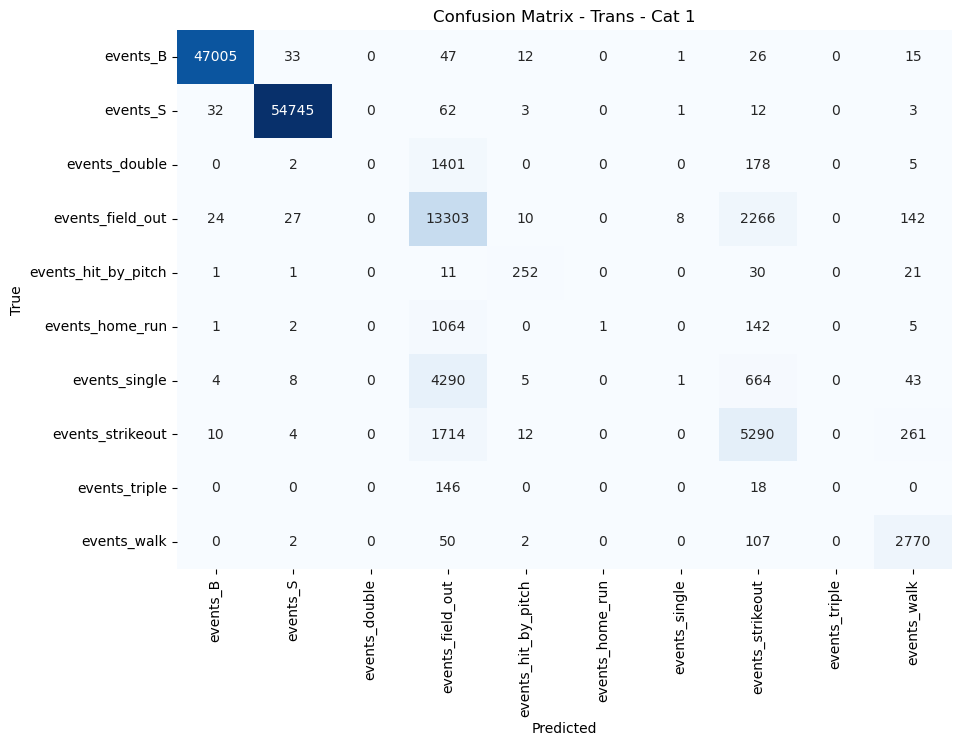

Confusion Matrix for Model 1 - Categorical Feature 2


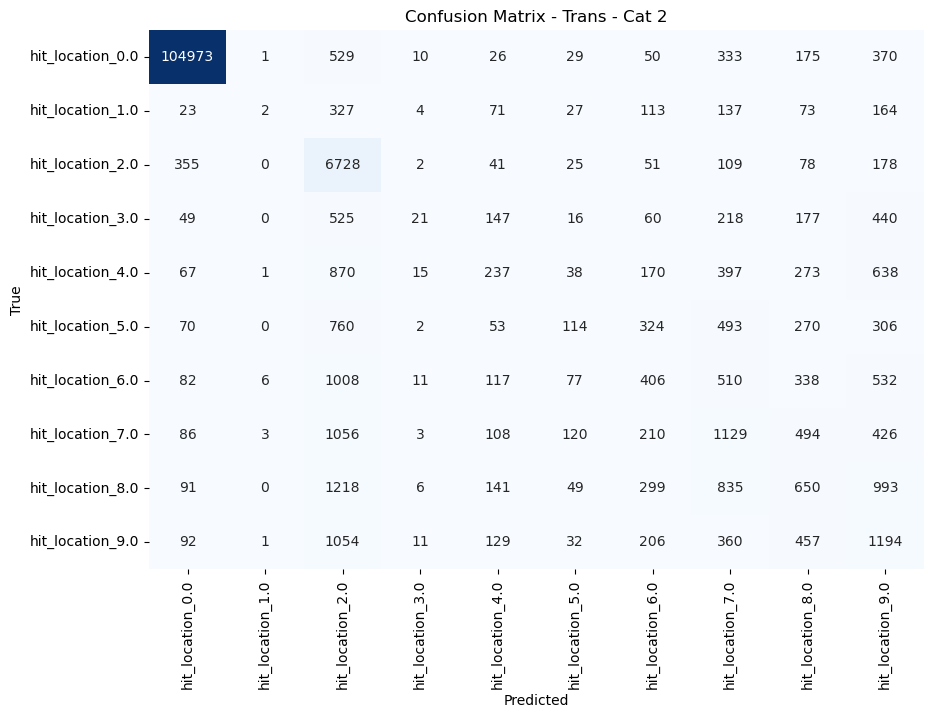

Confusion Matrix for Model 2 - Categorical Feature 1


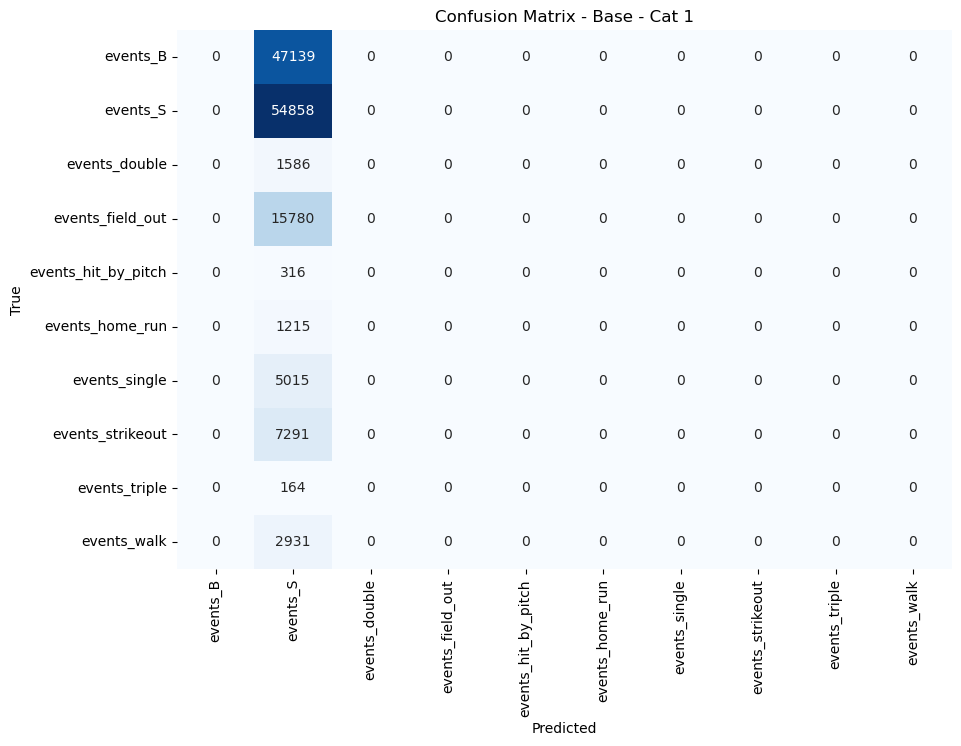

Confusion Matrix for Model 2 - Categorical Feature 2


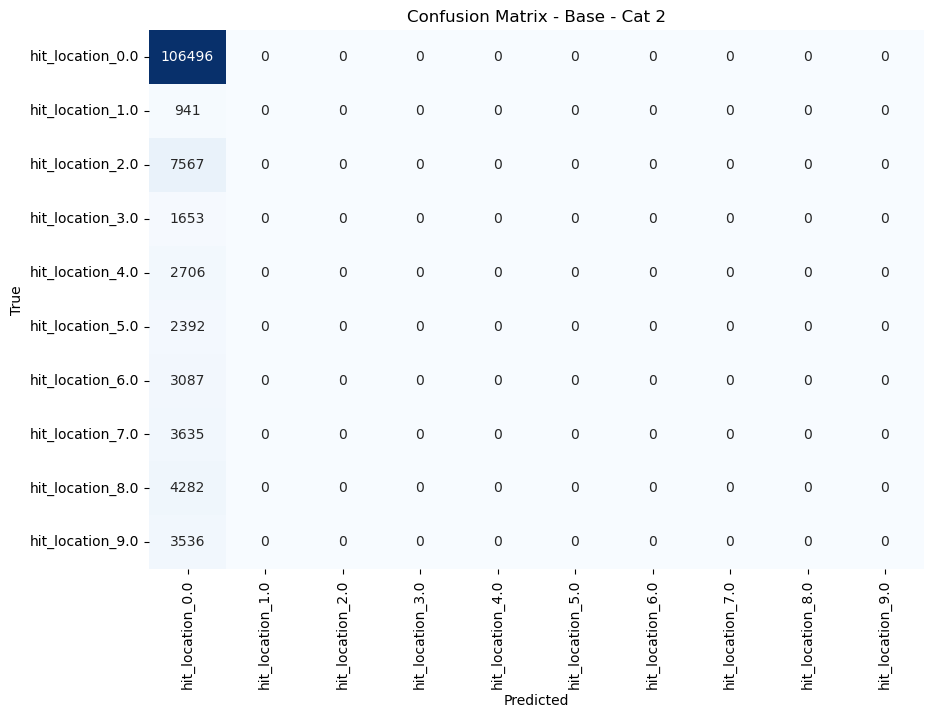

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming class names for each categorical feature are in columns
class_names_cat1 = true.columns[4:14]  # Class names for the first categorical feature
class_names_cat2 = true.columns[14:24]  # Class names for the second categorical feature



def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


# Plot confusion matrices for Model 1
print("Confusion Matrix for Model 1 - Categorical Feature 1")
plot_confusion_matrix(conf_matrix_trans_1, class_names_cat1, 'Confusion Matrix - Trans - Cat 1')

print("Confusion Matrix for Model 1 - Categorical Feature 2")
plot_confusion_matrix(conf_matrix_trans_2, class_names_cat2, 'Confusion Matrix - Trans - Cat 2')

# Plot confusion matrices for Model 2
print("Confusion Matrix for Model 2 - Categorical Feature 1")
plot_confusion_matrix(conf_matrix_base_1, class_names_cat1, 'Confusion Matrix - Base - Cat 1')

print("Confusion Matrix for Model 2 - Categorical Feature 2")
plot_confusion_matrix(conf_matrix_base_2, class_names_cat2, 'Confusion Matrix - Base - Cat 2')



